In [66]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('house_prices.csv', encoding='utf-8')
df.head()

,size_sqft,price
0,500,102
1,600,108
2,700,140
3,800,147
4,900,172


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   size_sqft  25 non-null     int64
 1   price      25 non-null     int64
dtypes: int64(2)
memory usage: 532.0 bytes


In [68]:
df.describe()

,size_sqft,price
count,25.000000,25.000000
mean,1508.000000,298.400000
std,608.221451,139.385556
min,500.000000,95.000000
25%,1000.000000,178.000000
50%,1500.000000,290.000000
75%,2000.000000,410.000000
max,2500.000000,535.000000


In [69]:
x = sm.add_constant(df["size_sqft"])
y = df["price"]

model = sm.OLS(y, x).fit()
fitted = model.fittedvalues
residuals = model.resid

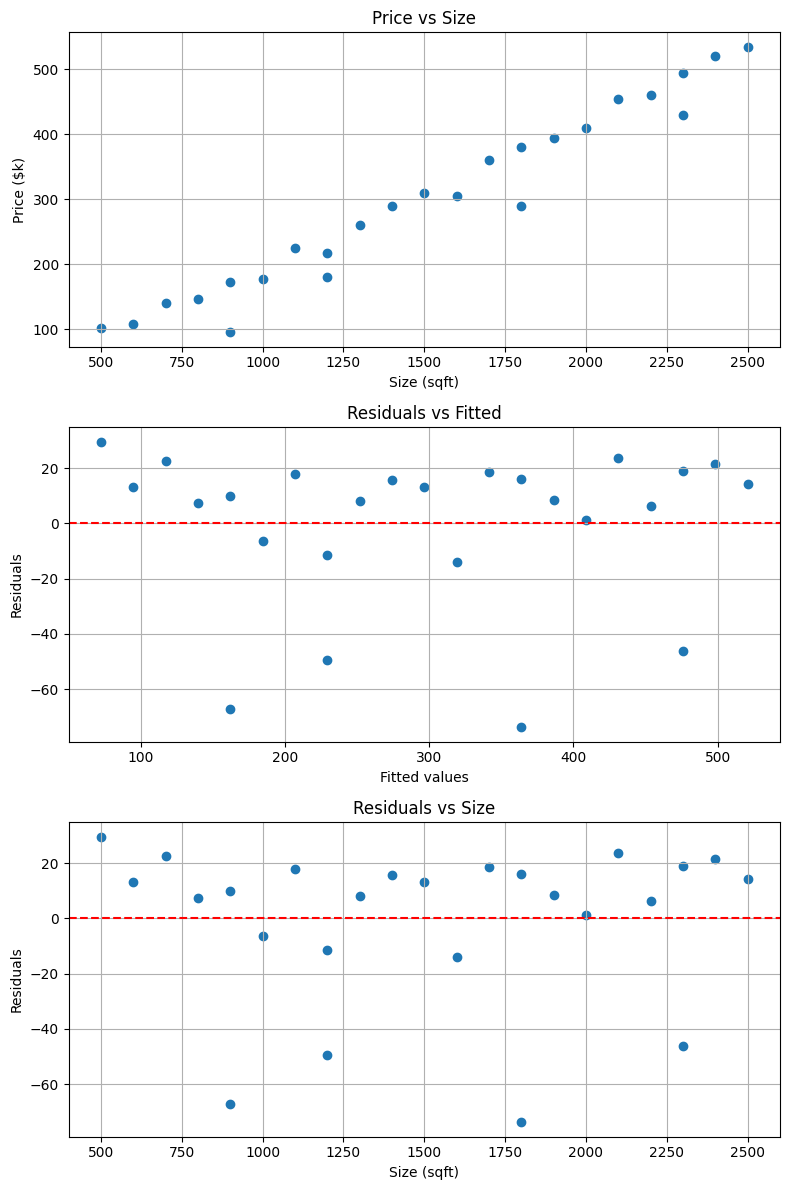

In [70]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].scatter(df["size_sqft"], df["price"])
axes[0].set_xlabel("Size (sqft)")
axes[0].set_ylabel("Price ($k)")
axes[0].set_title("Price vs Size")
axes[0].grid(True)

axes[1].scatter(fitted, residuals)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel("Fitted values")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs Fitted")
axes[1].grid(True)

axes[2].scatter(df["size_sqft"], residuals)
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_xlabel("Size (sqft)")
axes[2].set_ylabel("Residuals")
axes[2].set_title("Residuals vs Size")
axes[2].grid(True)

plt.tight_layout()
plt.show()


In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     520.3
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           2.70e-17
Time:                        13:24:03   Log-Likelihood:                -118.87
No. Observations:                  25   AIC:                             241.7
Df Residuals:                      23   BIC:                             244.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.7926     15.943     -2.496      0.020     -72.772      -6.813
size_sqft      0.2243      0.010     22.810      0.000       0.204       0.245
==============================================================================
Omnibus:                       11.712   Durbin-Watson:                   0.711
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.357
Skew:                          -1.492   Prob(JB):                      0.00564
Kurtosis:                       4.020   Cond. No.                     4.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
x0 = 1440
estimate_price = model.predict([1, x0])
estimate_price

array([283.14993693])

In [73]:
pred = model.get_prediction([1, x0])
pred_summary = pred.summary_frame(alpha=0.05)
pred_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,283.149937,5.897271,270.950503,295.349371,221.330366,344.969508


In [74]:
pi_lower = round(pred_summary.loc[0, 'obs_ci_lower'].item(), 2)
pi_upper = round(pred_summary.loc[0, 'obs_ci_upper'].item(), 2)

ci_lower = round(pred_summary.loc[0, 'mean_ci_lower'].item(), 2)
ci_upper = round(pred_summary.loc[0, 'mean_ci_upper'].item(), 2)

print(f'Prediction interval: [{pi_lower};{pi_upper}]')
print(f'Conf. interval: [{ci_lower};{ci_upper}]')

Prediction interval: [221.33;344.97]
Conf. interval: [270.95;295.35]
